<a href="https://colab.research.google.com/github/Yash19815/Stock_Market_Trend_Prediction/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing** **Data**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv(r'/content/drive/MyDrive/Machine_Learning_Project_Dataset/NIFTY_50_STOCKS.csv')
df.head()


,Date,Open,High,Low,Close,VWAP
0,20-09-2007,4734.850098,4760.850098,4721.149902,4747.549805,4743.183268
1,21-09-2007,4752.950195,4855.700195,4733.700195,4837.549805,4808.983398
2,24-09-2007,4837.149902,4941.149902,4837.149902,4932.200195,4903.5
3,25-09-2007,4939.100098,4953.899902,4878.149902,4938.850098,4923.633301
4,26-09-2007,4937.600098,4980.850098,4930.350098,4940.500000,4950.566732


## **Checking for missing data**

In [3]:
df.describe()
# print(df.isnull().astype(int))


,Open,High,Low,Close
count,3857.000000,3857.000000,3857.000000,3857.000000
mean,8938.098059,8989.253435,8871.977361,8931.907249
std,4209.636537,4219.612535,4190.569570,4206.166480
min,2553.600098,2585.300049,2252.750000,2524.199951
25%,5475.350098,5513.950195,5426.399902,5473.700195
50%,8110.850098,8151.200195,8062.750000,8108.450195
75%,11135.000000,11179.549810,11049.500000,11118.000000
max,18871.949220,18887.599610,18778.199220,18826.000000


In [4]:
df = df.dropna()
df

,Date,Open,High,Low,Close,VWAP
0,20-09-2007,4734.850098,4760.850098,4721.149902,4747.549805,4743.183268
1,21-09-2007,4752.950195,4855.700195,4733.700195,4837.549805,4808.983398
2,24-09-2007,4837.149902,4941.149902,4837.149902,4932.200195,4903.5
3,25-09-2007,4939.100098,4953.899902,4878.149902,4938.850098,4923.633301
4,26-09-2007,4937.600098,4980.850098,4930.350098,4940.500000,4950.566732
...,...,...,...,...,...,...
3882,12-06-2023,18595.050780,18633.599610,18559.750000,18601.500000,18598.2832
3883,13-06-2023,18631.800780,18728.900390,18631.800780,18716.150390,18692.28385
3884,14-06-2023,18744.599610,18769.699220,18690.000000,18755.900390,18738.5332
3885,15-06-2023,18774.449220,18794.099610,18669.050780,18688.099610,18717.08333


## **Plotting the data**

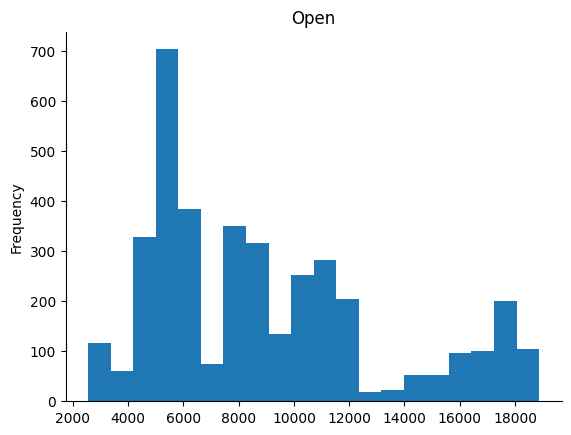

In [5]:
from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Date'>

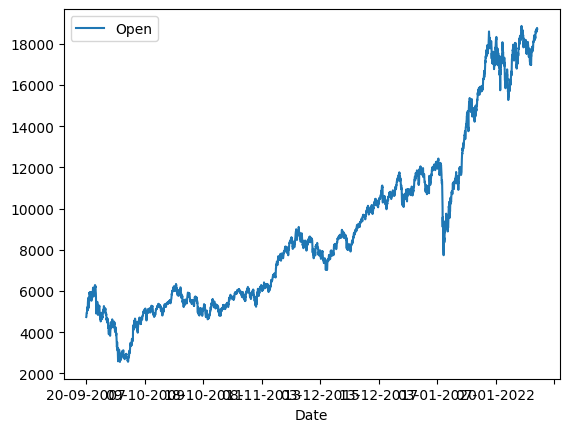

In [6]:
df.plot(y="Open", x="Date",)

<ipython-input-7-1eeec0183963>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df['Open'])


<Axes: ylabel='Density'>

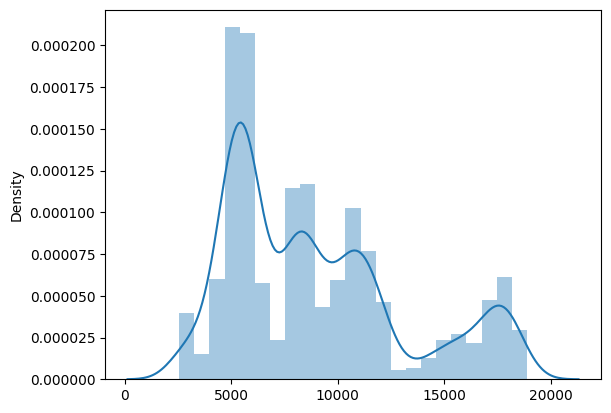

In [7]:
sns.distplot(x= df['Open'])


# **Removing Unnecessary Column and adding Tomorrow and Target column**

In [8]:
del df["VWAP"]

In [9]:
df["Tomorrow"]=df["Close"].shift(-1)

In [10]:
data= df.head(len(df) - 1)
df= data.dropna()

In [11]:
df["Target"]= (df["Tomorrow"]> df["Close"]).astype(int)

In [29]:
df

,Date,Open,High,Low,Close,Tomorrow,Target
0,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4837.549805,1
1,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4932.200195,1
2,2007-09-24,4837.149902,4941.149902,4837.149902,4932.200195,4938.850098,1
3,2007-09-25,4939.100098,4953.899902,4878.149902,4938.850098,4940.500000,1
4,2007-09-26,4937.600098,4980.850098,4930.350098,4940.500000,5000.549805,1
...,...,...,...,...,...,...,...
3881,2023-06-09,18655.900390,18676.650390,18555.400390,18563.400390,18601.500000,1
3882,2023-06-12,18595.050780,18633.599610,18559.750000,18601.500000,18716.150390,1
3883,2023-06-13,18631.800780,18728.900390,18631.800780,18716.150390,18755.900390,1
3884,2023-06-14,18744.599610,18769.699220,18690.000000,18755.900390,18688.099610,0


# Training

Randomforest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rndfor = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [35]:
def backtest(data, model, predictors, start=2500, step=250): #function to train the model
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [36]:
df["Date"]= pd.to_numeric(df["Date"], errors='coerce')

In [37]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [38]:
df = df.dropna()

In [39]:
df

,Date,Open,High,Low,Close,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1006,1318896000000000000,5049.450195,5057.500000,5011.049805,5037.500000,5139.149902,1,0.992049,0.0,0.989091,2.0,0.989147,23.0,0.906187,110.0,1.034383,508.0
1007,1318982400000000000,5080.450195,5148.049805,5075.299805,5139.149902,5091.899902,0,1.009989,1.0,1.007477,2.0,1.010438,24.0,0.925163,111.0,1.055190,508.0
1008,1319068800000000000,5086.549805,5099.000000,5033.950195,5091.899902,5049.950195,0,0.995382,1.0,0.997664,2.0,1.002929,23.0,0.917298,111.0,1.045454,507.0
1009,1319155200000000000,5106.600098,5120.750000,5037.950195,5049.950195,5098.350098,1,0.995864,0.0,0.992648,1.0,0.996729,22.0,0.910414,110.0,1.036818,506.0
1010,1319414400000000000,5114.700195,5145.649902,5084.750000,5098.350098,5191.600098,1,1.004769,1.0,1.002947,2.0,1.007862,23.0,0.919756,111.0,1.046721,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,1686268800000000000,18655.900390,18676.650390,18555.400390,18563.400390,18601.500000,1,0.998087,0.0,0.996776,3.0,1.038145,38.0,1.055881,136.0,1.266302,544.0
3882,1686528000000000000,18595.050780,18633.599610,18559.750000,18601.500000,18716.150390,1,1.001025,1.0,0.998740,3.0,1.038875,39.0,1.057508,137.0,1.268323,544.0
3883,1686614400000000000,18631.800780,18728.900390,18631.800780,18716.150390,18755.900390,1,1.003072,2.0,1.003633,3.0,1.043653,40.0,1.063485,137.0,1.275550,544.0
3884,1686700800000000000,18744.599610,18769.699220,18690.000000,18755.900390,18688.099610,0,1.001061,2.0,1.005446,3.0,1.044138,41.0,1.065125,138.0,1.277659,545.0


In [58]:
def predict(train, test, predictors, model): #function to predict the probablity whether market is going up or down
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
def cfm_show(actual, pred):  #function to plot the confusion matrix
  cfm = confusion_matrix(actual, pred)
  cfm_display = ConfusionMatrixDisplay(cfm)
  cfm_display.plot()
  plt.show
  return plt.show()
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
def eval(actual, pred): #function to evalute the model
  print("Classification Report:",classification_report(actual,pred))
  # print("Precision Score:",precision_score(actual,pred))
  # print("Accuracy:",accuracy_score(actual,pred))
  # print("F1 Score:",f1_score(actual,pred))
  # print("Recall Score:",recall_score(actual,pred))
  # print("Root Mean Squared Error:",mean_squared_error(actual,pred))


In [41]:
predictions = backtest(df, rndfor, new_predictors)

In [42]:
predictions["Predictions"].value_counts()

Predictions
0.0    327
1.0     29
Name: count, dtype: int64

In [59]:
eval(predictions["Target"], predictions["Predictions"])

Classification Report:               precision    recall  f1-score   support

           0       0.50      0.93      0.65       175
           1       0.59      0.09      0.16       181

    accuracy                           0.51       356
   macro avg       0.54      0.51      0.41       356
weighted avg       0.54      0.51      0.40       356



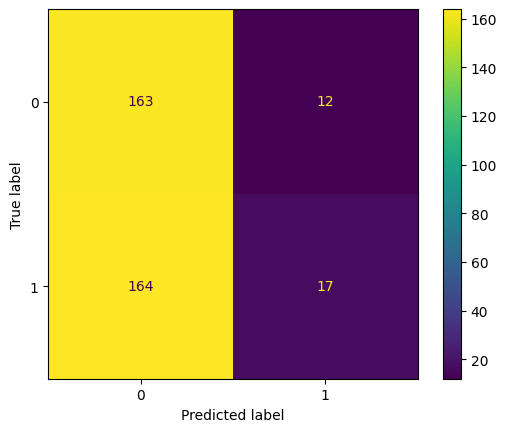

In [44]:
cfm_show(predictions["Target"], predictions["Predictions"])

# DecisionTree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [46]:
predictions1 = backtest(df, dtc, new_predictors)

In [47]:
predictions1["Predictions"].value_counts()

Predictions
0.0    213
1.0    143
Name: count, dtype: int64

In [60]:
eval(predictions1["Target"], predictions1["Predictions"])

Classification Report:               precision    recall  f1-score   support

           0       0.52      0.63      0.57       175
           1       0.55      0.43      0.48       181

    accuracy                           0.53       356
   macro avg       0.53      0.53      0.52       356
weighted avg       0.53      0.53      0.52       356



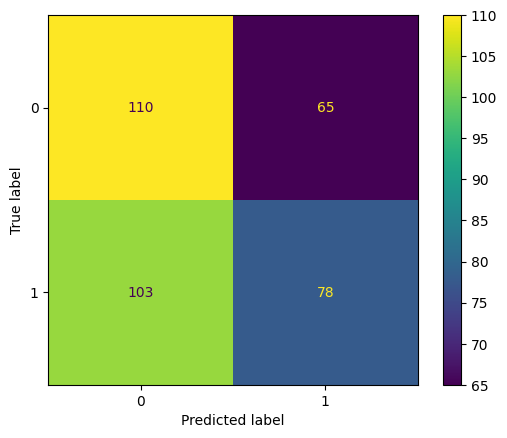

In [49]:
cfm_show(predictions1["Target"], predictions1["Predictions"])

# HistGradientBoostingClassifier

In [50]:
from sklearn.ensemble import HistGradientBoostingClassifier
hbc = HistGradientBoostingClassifier()

In [51]:
predictions2 = backtest(df, hbc, new_predictors)

In [52]:
predictions2["Predictions"].value_counts()

Predictions
0.0    278
1.0     78
Name: count, dtype: int64

In [61]:
eval(predictions2["Target"], predictions2["Predictions"])

Classification Report:               precision    recall  f1-score   support

           0       0.51      0.81      0.62       175
           1       0.56      0.24      0.34       181

    accuracy                           0.52       356
   macro avg       0.54      0.52      0.48       356
weighted avg       0.54      0.52      0.48       356



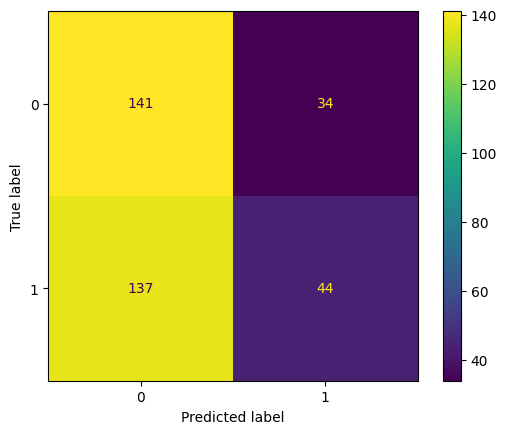

In [54]:
cfm_show(predictions2["Target"], predictions2["Predictions"])

In [57]:
from sklearn.metrics import classification_report

report = classification_report(predictions["Target"], predictions["Predictions"])

print("Classification Report for RandomForest:")
print(report)

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.50      0.93      0.65       175
           1       0.59      0.09      0.16       181

    accuracy                           0.51       356
   macro avg       0.54      0.51      0.41       356
weighted avg       0.54      0.51      0.40       356

